In [45]:
import pandas as pd # getting the data
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [48]:
df = pd.read_csv('ICPSR_04572/DS0001/04572-0001-Data.tsv', sep='\t')
df.head()

,V0001,V0002,V0003,V0004,V0005,V0006,V0007,V0008,V0009,V0010,...,CS_INCDA,CS_INCJ,CS_INCA,CH_NUMCAR,CH_NUMCAR1,CH_NUMCAR2,CH_NUMCAR3,CH_NUMCAR4,CH_NUMCAR5,CH_CRIM_HISTORY
0,15717,10,201,2,2,0,5,10,215,99,...,0,0,0,0,1,1,1,1,1,2
1,15718,10,201,2,2,0,5,8,310,99,...,0,0,0,0,1,1,1,1,1,2
2,15719,10,201,2,2,0,5,2,145,99,...,0,0,0,0,1,1,1,1,1,2
3,15720,10,201,2,2,0,5,6,150,99,...,0,0,0,0,1,1,1,1,1,2
4,15721,10,201,2,2,0,4,11,183,99,...,0,0,1,1,2,1,2,2,2,1


In [49]:
df.shape

(3686, 3374)

In [50]:
df2 = pd.read_csv('ICPSR_04572/DS0002/04572-0002-Data.tsv', sep='\t')

In [51]:
df2.shape

(14499, 3374)

In [52]:
all(df2.columns == df.columns)

True

In [53]:
df = df.append(df2) # putting the two files together

In [54]:
df.shape

(18185, 3374)

In [55]:
# target variables
targets = {'v2517':'Breaking rules',
'V2518':'drugs',
'V2519':'n_drugs',
'V2520':'alcohol',
'V2521':'n_alcohol',
'V2522':'weapon_poss',
'V2523':'n_reapon_poss',
'V2524':'stolen_prop',
'V2525':'n_stolen_prop',
'V2526':'poss_unauth',
'V2527':'n_poss_unauth',
'V2528':'verbal_staff',
'V2527':'n_verbal_staff',
'V2530':'phys_staff',
'V2531':'n_phys_staff',
'V2532':'verb_inmate',
'V2533':'n_verb_inmate',
'V2534':'phys_inmate',
'V2535':'n_phys_inmate',
'V2536':'att_escape',
'V2537':'n_att_escape',
'V2538':'out_place',
'V2539':'n_out_place',
'V2540':'disobey_ord',
'V2541':'n_disobey_ord',
'V2542':'maj_violation',
'V2543':'n_maj_violation',
'V2544':'minor_violation',
'V2545':'n_minor_violation',
'V2546':'other_violation',
'V2547':'n_other_violation',
'V2549':'recent_violations',
}
df.rename(mapper=targets, axis='columns', inplace=True)

We don't have time of infractions. Or the security level/ punishment. 

In [56]:
# 

Our targets will be drug violations, assault on staff, assault on inmates, attempt to escape, other violations and the most recent violation.

We have an incredible number of possible features that ar enot named. to save on cleaning time we will look at the most ocrrelated potential features and work on cleaning those so we don;t spend time on variables that we will not use. 
* correlation with preprison sentencing and custody level in prison
* violations and levels of custody
* correlations between punsihements and violations
* look at jail composition and the nature of violations



# feature selection
* find some variables that we think would be particualrly important
* look for what the data tells us is important
* use a combination of the 2 to determine which variables

In [57]:
#Creates a heatmap to compare the top features most correlated with saleprice
def heatmap(data, num_features, primary_feature, title):
    corrmat = data.corr()
    columns = corrmat.nlargest(num_features, primary_feature)[primary_feature].index
    cm = np.corrcoef(data[columns].values.T)
    sns.set(font_scale=1.25)
    f, ax = plt.subplots(figsize=(14, 10))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
    plt.title(title)
    plt.show()
    print(columns)
    return

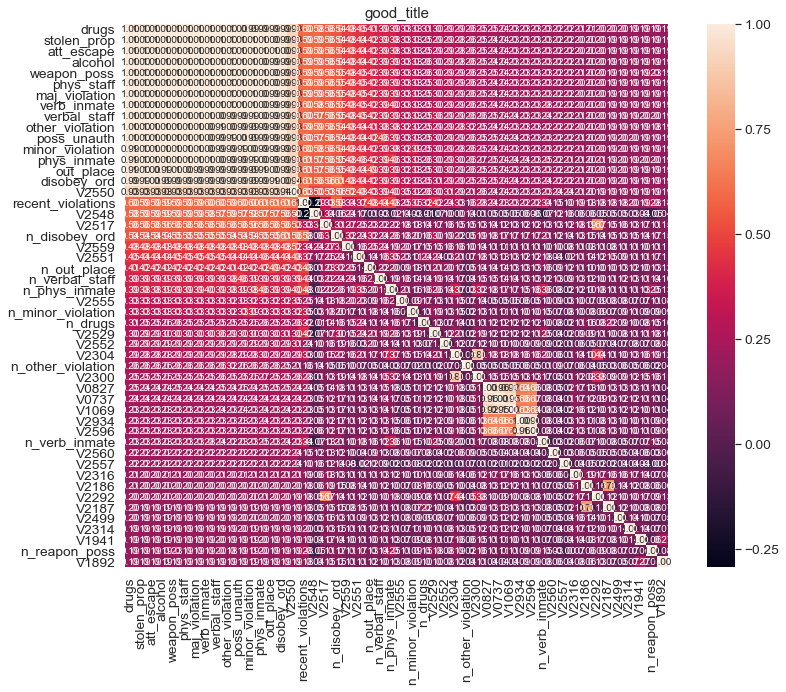

Index(['drugs', 'stolen_prop', 'att_escape', 'alcohol', 'weapon_poss',
       'phys_staff', 'maj_violation', 'verb_inmate', 'verbal_staff',
       'other_violation', 'poss_unauth', 'minor_violation', 'phys_inmate',
       'out_place', 'disobey_ord', 'V2550', 'recent_violations', 'V2548',
       'V2517', 'n_disobey_ord', 'V2559', 'V2551', 'n_out_place',
       'n_verbal_staff', 'n_phys_inmate', 'V2555', 'n_minor_violation',
       'n_drugs', 'V2529', 'V2552', 'V2304', 'n_other_violation', 'V2300',
       'V0827', 'V0737', 'V1069', 'V2934', 'V2596', 'n_verb_inmate', 'V2560',
       'V2557', 'V2316', 'V2186', 'V2292', 'V2187', 'V2499', 'V2314', 'V1941',
       'n_reapon_poss', 'V1892'],
      dtype='object')


In [58]:
heatmap(df, 30, 'drugs', 'good_title')

In [28]:
'drugs' in df.columns

False

In [29]:
for x in df.columns:
    print(x)

V0001
V0002
V0003
V0004
V0005
V0006
V0007
V0008
V0009
V0010
V0011
V0012
V0013
V0014
V0015
V0016
V0017
V0018
V0019
V0020
V0021
V0022
V0023
V0024
V0025
V0026
V0027
V0028
V0029
V0030
V0031
V0032
V0033
V0034
V0035
V0036
V0037
V0038
V0039
V0040
V0041
V0042
V0043
V0044
V0045
V0046
V0047
V0048
V0049
V0050
V0051
V0052
V0053
V0054
V0055
V0056
V0057
V0058
V0059
V0060
V0061
V0062
V0063
V0064
V0065
V0066
V0067
V0068
V0069
V0070
V0071
V0072
V0073
V0074
V0075
V0076
V0077
V0078
V0079
V0080
V0081
V0082
V0083
V0084
V0085
V0086
V0087
V0088
V0089
V0090
V0091
V0092
V0093
V0094
V0095
V0096
V0097
V0098
V0099
V0100
V0101
V0102
V0103
V0104
V0105
V0106
V0107
V0108
V0109
V0110
V0111
V0112
V0113
V0114
V0115
V0116
V0117
V0118
V0119
V0120
V0121
V0122
V0123
V0124
V0125
V0126
V0127
V0128
V0129
V0130
V0131
V0132
V0133
V0134
V0135
V0136
V0137
V0138
V0139
V0140
V0141
V0142
V0143
V0144
V0145
V0146
V0147
V0148
V0149
V0150
V0151
V0152
V0153
V0154
V0155
V0156
V0157
V0158
V0159
V0160
V0161
V0162
V0163
V0164
V0165
V0166
V016

V1789
V1790
V1791
V1792
V1793
V1794
V1795
V1796
V1797
V1798
V1799
V1800
V1801
V1802
V1803
V1804
V1805
V1806
V1807
V1808
V1809
V1810
V1811
V1812
V1813
V1814
V1815
V1816
V1817
V1818
V1819
V1820
V1821
V1822
V1823
V1824
V1825
V1826
V1827
V1828
V1829
V1830
V1831
V1832
V1833
V1834
V1835
V1836
V1837
V1838
V1839
V1840
V1841
V1842
V1843
V1844
V1845
V1846
V1847
V1848
V1849
V1850
V1851
V1852
V1853
V1854
V1855
V1856
V1857
V1858
V1859
V1860
V1861
V1862
V1863
V1864
V1865
V1866
V1867
V1868
V1869
V1870
V1871
V1872
V1873
V1874
V1875
V1876
V1877
V1878
V1879
V1880
V1881
V1882
V1883
V1884
V1885
V1886
V1887
V1888
V1889
V1890
V1891
V1892
V1893
V1894
V1895
V1896
V1897
V1898
V1899
V1900
V1901
V1902
V1903
V1904
V1905
V1906
V1907
V1908
V1909
V1910
V1911
V1912
V1913
V1914
V1915
V1916
V1917
V1918
V1919
V1920
V1921
V1922
V1923
V1924
V1925
V1926
V1927
V1928
V1929
V1930
V1931
V1932
V1933
V1934
V1935
V1936
V1937
V1938
V1939
V1940
V1941
V1942
V1943
V1944
V1945
V1946
V1947
V1948
V1949
V1950
V1951
V1952
V1953
V1954
V195

IC_MANYVICT_YOUNGEST
IC_MANYVICT_OLDEST
IC_MANYVICT_KNOWNVICT
IC_MANYVICT_SPOUSE
IC_MANYVICT_EXSPOUSE
IC_MANYVICT_PARENT
IC_MANYVICT_OWNCHILD
IC_MANYVICT_STEPCHILD
IC_MANYVICT_SIBLINGS
IC_MANYVICT_OTHERRELATIVE
IC_MANYVICT_BOYGIRLFRIEND
IC_MANYVICT_EXBOYGIRLFRIEND
IC_MANYVICT_FRIEND
IC_MANYVICT_OTHERNONRELATIVE
GENDER
CAT_AGE2
CAT_AGE3
DRUG_ABUSE_OBLIGATIONS
DRUG_ABUSE_HAZARDOUS
DRUG_ABUSE_LEGAL_PROBS
DRUG_ABUSE_SOCIAL_PROBS
DRUG_ABUSE_SYMPTOMS
DRUG_ABUSE_DSMIV
DRUG_DEPENDENCE_TOLERANCE
DRUG_DEPENDENCE_WITHDRAWAL
DRUG_DEPENDENCE_COMPULSIVE
DRUG_DEPENDENCE_IMPAIRED
DRUG_DEPENDENCE_TIME_SPENT
DRUG_DEPENDENCE_NEGLECT
DRUG_DEPENDENCE_CONTINUED_USE
DRUG_DEPENDENCE_SYMPTOMS_CAT
DRUG_DEPENDENCE_OR_ABUSE
DRUG_DEPENDENCE_AND_ABUSE
DRUG_DEPENDENCE_ONLY
DRUG_ABUSE_ONLY
DRUG_DEPENDENCE_OR_ABUSE_NONE
DRUG_DEPENDENCE
DRUG_HIERARCHY
DRUG_HIERARCHY2
TYPEOFFENSE
MOST_SERIOUS_OFFENSE1
OFFENSE_PUBLICORDER
MOST_SERIOUS_OFFENSE2
MONEY_FOR_DRUGS
SEX_OFFENDER
MCMH_PRESCRIP_MEDS_ARREST
MCMH_HIVTEST
MCMH_RSLT_

In [59]:
#Creates a heatmap to compare the top features most correlated with saleprice
def neg_heatmap(data, num_features, primary_feature, title):
    corrmat = data.corr()
    columns = corrmat.nsmallest(num_features, primary_feature)[primary_feature].index
    cm = np.corrcoef(data[columns].values.T)
    sns.set(font_scale=1.25)
    f, ax = plt.subplots(figsize=(14, 10))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
    plt.title(title)
    plt.show()
    print(columns)
    return

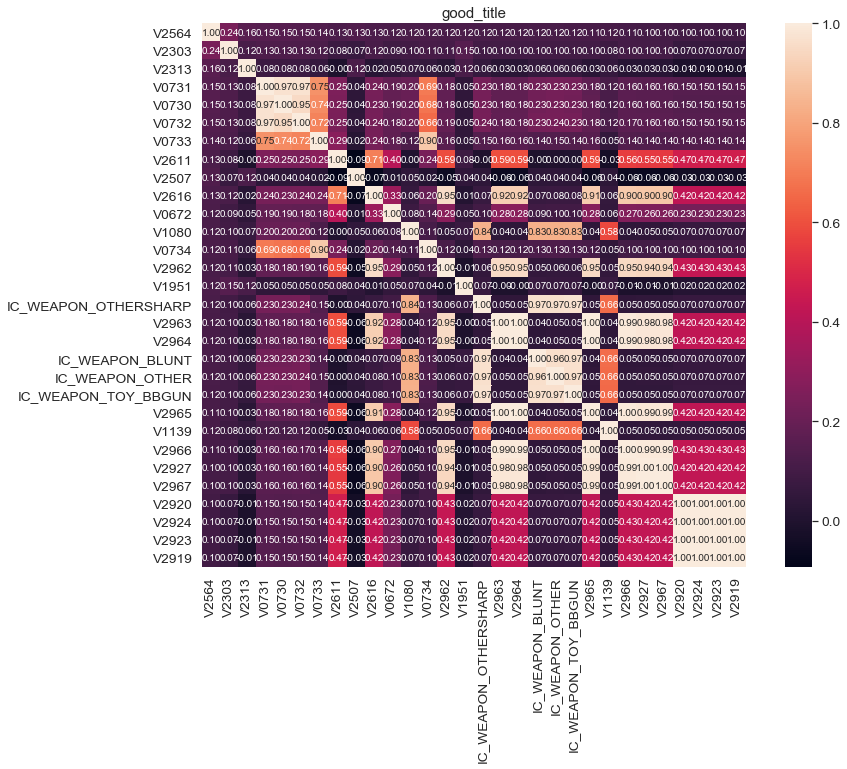

Index(['V2564', 'V2303', 'V2313', 'V0731', 'V0730', 'V0732', 'V0733', 'V2611',
       'V2507', 'V2616', 'V0672', 'V1080', 'V0734', 'V2962', 'V1951',
       'IC_WEAPON_OTHERSHARP', 'V2963', 'V2964', 'IC_WEAPON_BLUNT',
       'IC_WEAPON_OTHER', 'IC_WEAPON_TOY_BBGUN', 'V2965', 'V1139', 'V2966',
       'V2927', 'V2967', 'V2920', 'V2924', 'V2923', 'V2919'],
      dtype='object')


In [60]:
neg_heatmap(df, 30, 'drugs', 'good_title')